# Verify metadata info

Get an overall idea of the current state of the validators metadata

In [1]:
import pandas as pd


versions = ['1.0.0', '1.0.1', '1.0.2', '1.0.4', '1.0.5', '1.0.6']

metadata_dfs = []

for version in versions:
    metadata_dfs.append(pd.read_csv(f'hf://datasets/opentensor/openvalidators/{version}/metadata.csv'))    

all_metadata = pd.concat(metadata_dfs, ignore_index=True)

print('All runs:', len(all_metadata), )
print('All downloaded runs:', all_metadata['downloaded'].sum(), '✅')
print('All problematic runs:', all_metadata['problematic'].sum(), '❌')
print('All runs in progress:', len(all_metadata.loc[(all_metadata['downloaded'] == False) & (all_metadata['problematic'] == False)]), '⏳')
print(f'Amount of collected rows: {all_metadata["logged_rows"].sum():,d}', '📝')
print('-' * 50)

groups_by_version = all_metadata.groupby('openvalidators_version')

for version, version_df in groups_by_version:
    print(f'version {version} total runs:', len(version_df))
    print(f'version {version} total downloaded runs:', version_df['downloaded'].sum(), '✅')
    print(f'version {version} total problematic runs:', version_df['problematic'].sum(), '❌')    
    print(f'version {version} total runs in progress:', len(version_df.loc[(version_df['downloaded'] == False) & (version_df['problematic'] == False)]), '⏳')
    print(f'version {version} total collected rows: {version_df["logged_rows"].sum():,d}', '📝')
    print('*' * 50)

All runs: 1582
All downloaded runs: 1299 ✅
All problematic runs: 232 ❌
All runs in progress: 51 ⏳
Amount of collected rows: 1,545,742 📝
--------------------------------------------------
version 1.0.0 total runs: 479
version 1.0.0 total downloaded runs: 455 ✅
version 1.0.0 total problematic runs: 24 ❌
version 1.0.0 total runs in progress: 0 ⏳
version 1.0.0 total collected rows: 560,015 📝
**************************************************
version 1.0.1 total runs: 10
version 1.0.1 total downloaded runs: 9 ✅
version 1.0.1 total problematic runs: 1 ❌
version 1.0.1 total runs in progress: 0 ⏳
version 1.0.1 total collected rows: 9,203 📝
**************************************************
version 1.0.2 total runs: 260
version 1.0.2 total downloaded runs: 253 ✅
version 1.0.2 total problematic runs: 7 ❌
version 1.0.2 total runs in progress: 0 ⏳
version 1.0.2 total collected rows: 344,621 📝
**************************************************
version 1.0.4 total runs: 509
version 1.0.4 total downl

# OpenAI Mining dataset

In [10]:
import pandas as pd

path = 'hf://datasets/opentensor/openvalidators-mining/openai/scanned_runs.csv'
opeai_df = pd.read_csv(path)
print('Total of unique rows in OpenAI dataset: ',f"{opeai_df['unique_rows_contrib'].sum():,d}")

Total of unique rows in OpenAI dataset:  573,751


## Sum of logged runs by version

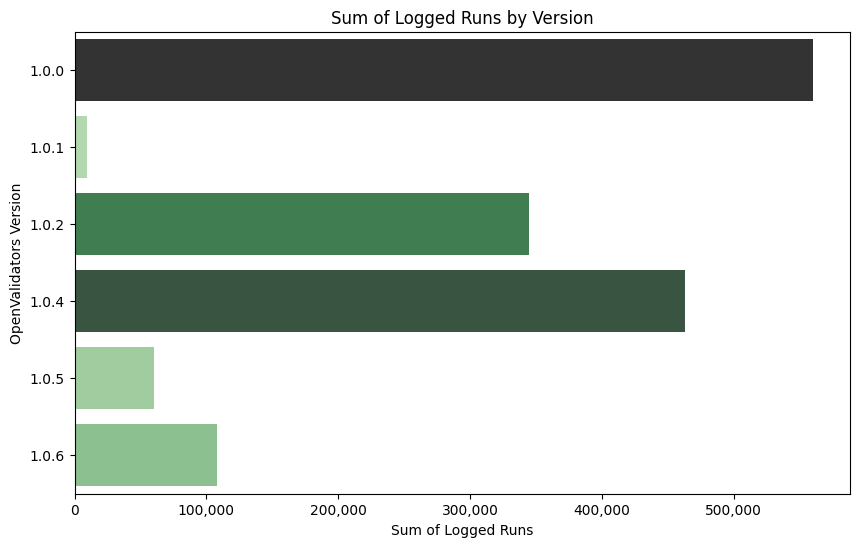

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_sum_logged_runs(df):
    sum_runs = df.groupby('openvalidators_version')['logged_rows'].sum().reset_index()

    plt.figure(figsize=(10, 6))


    cmap = sns.color_palette("Greens_d", as_cmap=True)
    norm = plt.Normalize(sum_runs['logged_rows'].min(), sum_runs['logged_rows'].max())
    
    ax = sns.barplot(x='logged_rows', y='openvalidators_version', data=sum_runs, orient='h',  palette=cmap(norm(sum_runs['logged_rows'].values)))
    ax.set_title('Sum of Logged Runs by Version')
    ax.set_xlabel('Sum of Logged Runs')
    ax.set_ylabel('OpenValidators Version')
    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    plt.show()


plot_sum_logged_runs(all_metadata)

## Progression of added new rows and new runs through time

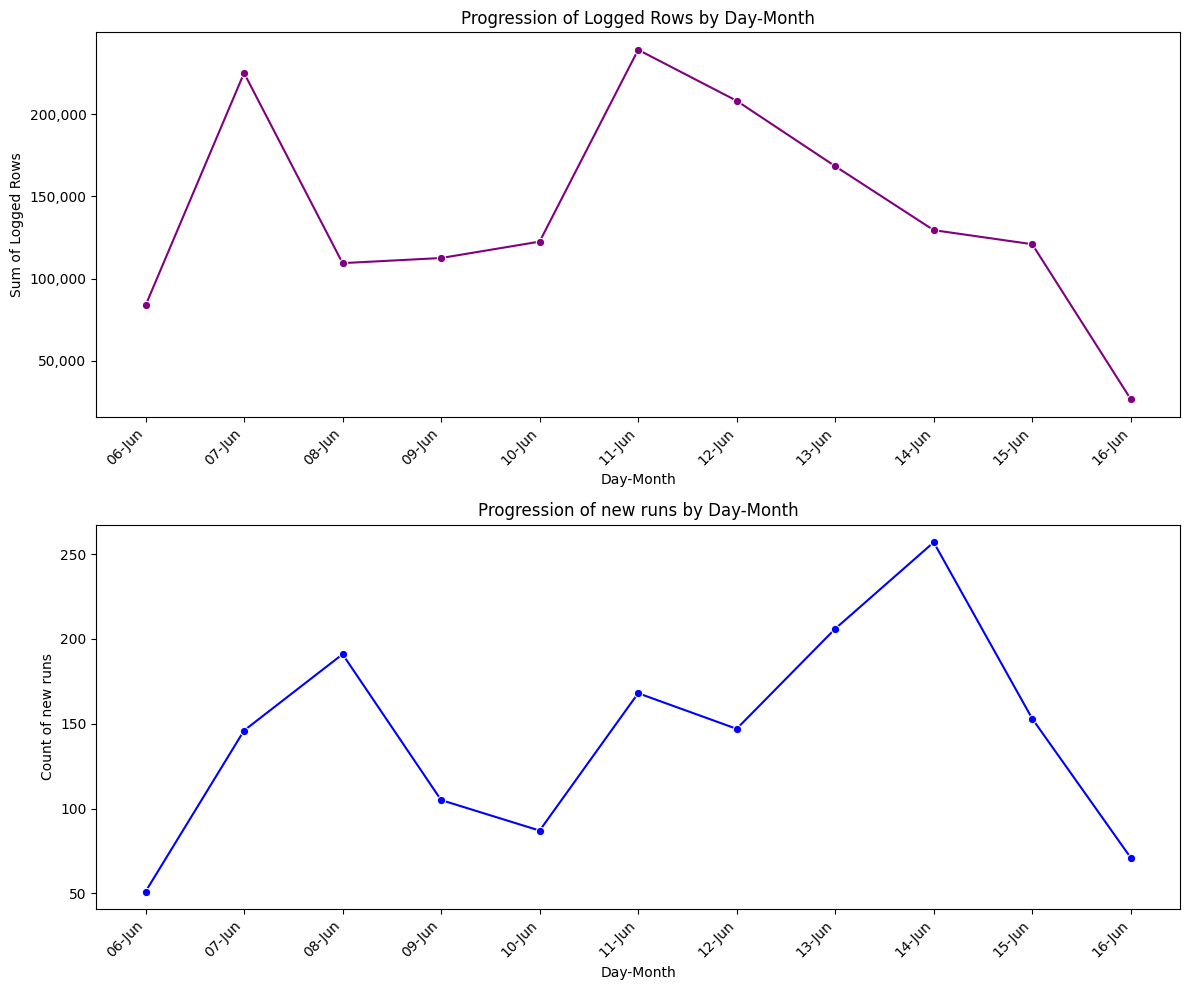

In [3]:
def plot_logged_rows_progression(df):
    # Convert "wandb_createdAt" column to datetime
    df['wandb_createdAt'] = pd.to_datetime(df['wandb_createdAt'])

    # Extract day and month from "wandb_createdAt" column
    df['day_month'] = df['wandb_createdAt'].dt.strftime('%d-%b')

    # Group by day-month and calculate the sum of logged rows
    grouped_sum = df.groupby('day_month')['logged_rows'].sum().reset_index()

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 1, 1)
    ax = sns.lineplot(x='day_month', y='logged_rows', marker='o',  data=grouped_sum, color='purple')
    plt.title('Progression of Logged Rows by Day-Month')
    plt.xlabel('Day-Month')
    plt.ylabel('Sum of Logged Rows')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

      # Format y-axis labels with commas
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))


    plt.subplot(2, 1, 2)
    sns.lineplot(x='day_month', y='Count', marker='o',  data=df.groupby('day_month').size().reset_index(name='Count'), color='blue')
    plt.title('Progression of new runs by Day-Month')
    plt.xlabel('Day-Month')
    plt.ylabel('Count of new runs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

plot_logged_rows_progression(all_metadata)

## Progression of problematic runs through time

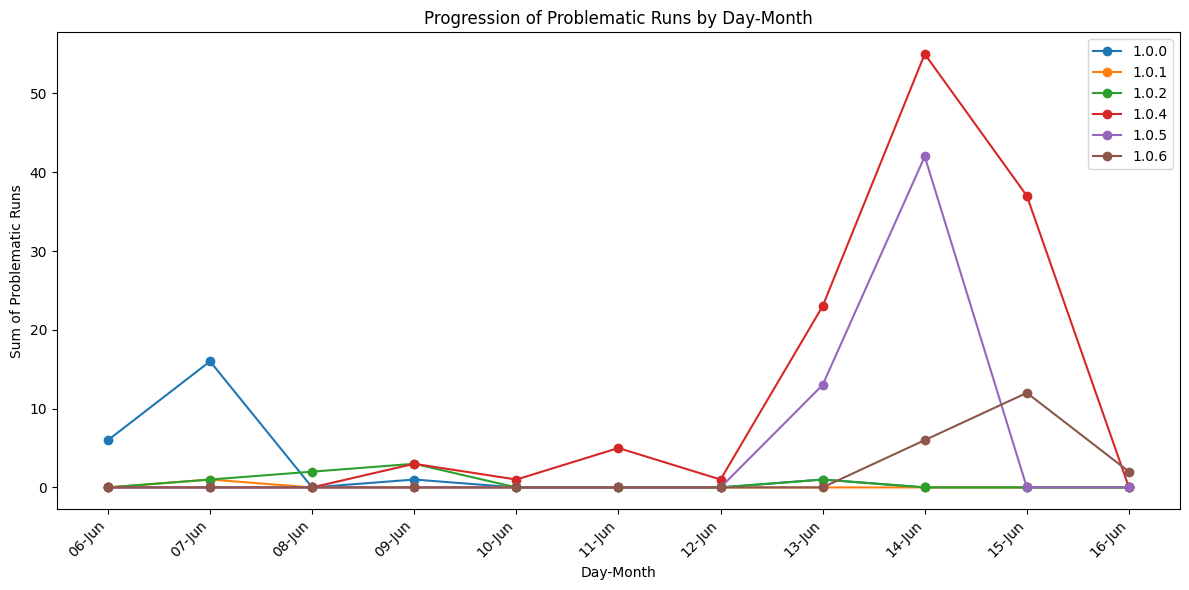

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_problematic_runs(df):
    # Convert "wandb_createdAt" column to datetime
    df['wandb_createdAt'] = pd.to_datetime(df['wandb_createdAt'])

    # Extract day and month from "wandb_createdAt" column
    df['day_month'] = df['wandb_createdAt'].dt.strftime('%d-%b')

    # Group by day-month and version, count problematic runs
    grouped = df.groupby(['day_month', 'openvalidators_version'])['problematic'].sum().reset_index()

    # Pivot the data to have versions as columns
    pivot_df = grouped.pivot(index='day_month', columns='openvalidators_version', values='problematic').fillna(0)

    plt.figure(figsize=(12, 6))
    for column in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[column], marker='o', label=column)

    plt.title('Progression of Problematic Runs by Day-Month')
    plt.xlabel('Day-Month')
    plt.ylabel('Sum of Problematic Runs')
    plt.legend()
    plt.xticks(rotation=45, ha='right')

    # Format x-axis tick labels as day-month
    ax = plt.gca()    
    plt.tight_layout()
    plt.show()

plot_problematic_runs(all_metadata)

## Problematic runs troubleshooting

<Axes: >

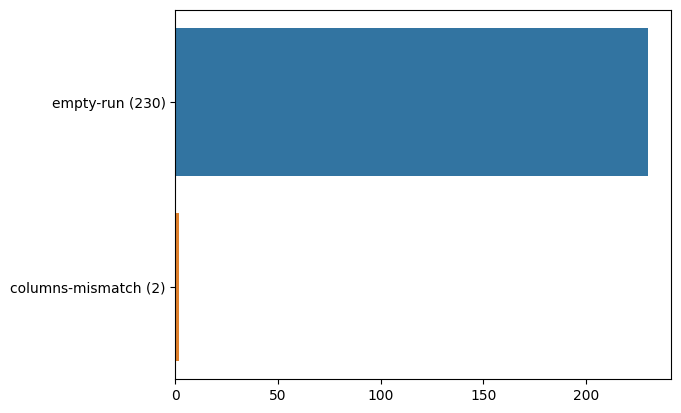

In [5]:
def extract_column_differences(column_string):
    """Helper function for extracting the missing and extra columns from the column string in the metadata file"""
    expected_start = column_string.find("Expected columns: ") + len("Expected columns: ")
    actual_start = column_string.find("Actual columns: ") + len("Actual columns: ")
    expected_end = column_string.find("Actual columns: ") - len(" \n                          ")
    
    expected_columns = column_string[expected_start:expected_end].strip().strip("[]").replace("'", "").split(", ")
    actual_columns = column_string[actual_start:].strip().strip("[]").replace("'", "").split(", ")
    
    missing_columns = list(set(expected_columns) - set(actual_columns))
    extra_columns = list(set(actual_columns) - set(expected_columns))
    
    return {
        "missing_columns": missing_columns,
        "extra_columns": extra_columns,
        "actual_columns": actual_columns
    }


def diagnose_problematic_reason(problematic_reason) -> str:    
    if not isinstance(problematic_reason, str):
        return None

    
    diagnosis = ''
    if "Expected columns" in problematic_reason or "Actual columns" in problematic_reason :
        diagnosis = 'columns-mismatch'
        
        actual_columns_string_start = problematic_reason.find("Actual columns: ") + len("Actual columns: ")
        actual_columns_string = problematic_reason[actual_columns_string_start:].strip().strip("[]").replace("'", "").split(", ")

        if actual_columns_string == ['']:
            diagnosis = 'empty-run'
    else:
        diagnosis = 'unknown'

    return diagnosis
    

all_metadata['diagnosis'] = all_metadata['problematic_reason'].apply(diagnose_problematic_reason)
counts = all_metadata['diagnosis'].value_counts()
counts.index = counts.index + ' (' + counts.values.astype(str) + ')'

sns.barplot(x=counts.values, y=counts.index, orient='h')

## Print unknown problematic runs

In [6]:
unknown_cond = all_metadata['diagnosis'] == 'unknown'

all_metadata[unknown_cond][['run_id', 'openvalidators_version']]

,run_id,openvalidators_version


## Spot mismatched columns

In [7]:
def extract_column_differences(column_string):
    expected_start = column_string.find("Expected columns: ") + len("Expected columns: ")
    actual_start = column_string.find("Actual columns: ") + len("Actual columns: ")
    expected_end = column_string.find("Actual columns: ") - len(" \n                          ")
    
    expected_columns = column_string[expected_start:expected_end].strip().strip("[]").replace("'", "").split(", ")
    actual_columns = column_string[actual_start:].strip().strip("[]").replace("'", "").split(", ")
    
    missing_columns = list(set(expected_columns) - set(actual_columns))
    extra_columns = list(set(actual_columns) - set(expected_columns))
    
    return {
        "missing_columns": missing_columns,
        "extra_columns": extra_columns,
        "actual_columns": actual_columns
    }

mismatch_df = all_metadata[all_metadata['diagnosis'] == 'columns-mismatch']

for row in mismatch_df.iterrows():
    row = row[1]
    print('Run id:', row['run_id'], 'Version', row['openvalidators_version'])
    column_differences = extract_column_differences(row['problematic_reason'])
    print('Differences:', column_differences)
    print('*' * 100)

Run id: feqdpa93 Version 1.0.0
Differences: {'missing_columns': ['moving_averaged_scores'], 'extra_columns': ['followup_scoring_uids', 'best_followup_scoring', 'followup_scoring_completions', 'answer_scoring_values', 'followup_scorings', 'answer_scoring_completions', 'answer_scoring_uids', 'best_answer_scoring', 'followup_scoring_values', 'answer_scorings'], 'actual_columns': ['followup_scoring_completions', 'answer_prompt', 'followup_rewards', 'answer_scoring_uids', 'answer_completions', 'best_followup_scoring', 'answer_scoring_completions', '_step', 'block', '_runtime', 'answer_scorings', 'followup_scoring_uids', 'base_prompt', 'gating_loss', 'followup_uids', '_timestamp', 'answer_rewards', 'gating_scorings', 'answer_scoring_values', 'followup_scoring_values', 'answer_uids', 'followup_times', 'followup_scorings', 'step_length', 'best_followup', 'best_answer', 'answer_times', 'best_answer_scoring', 'followup_completions', 'set_weights']}
***********************************************

## Helper functions

`reset_problematic_runs(version, run_ids)`: Helper function to reset problematic runs in the metadata file of a specific version. Useful for dealing with unknown problematic reasons

In [8]:
def reset_problematic_runs(version, run_ids):
    """Helper function to reset problematic runs in the metadata file of a specific version"""
    path = f'hf://datasets/opentensor/openvalidators/{version}/metadata.csv'
    metadata_df = pd.read_csv(path)

    print('Total problematic runs before', len(metadata_df[metadata_df['problematic'] == True]))

    # Get the index of the run to reset
    for run_id in run_ids:
        run_id_metadata_row = metadata_df.loc[metadata_df['run_id'] == run_id]

        if len(run_id_metadata_row) != 0:
            # Reset the problematic column
            metadata_df.loc[run_id_metadata_row.index, 'problematic'] = False
            metadata_df.loc[run_id_metadata_row.index, 'problematic_reason'] = None    

    print('Total problematic runs after', len(metadata_df[metadata_df['problematic'] == True]))
    metadata_df.to_csv(path, index=False)
    return metadata_df

#reset_problematic_runs('1.0.x', ['run_ids'])

In [9]:
# Drop unnamed columns
# columns = [f'Unnamed: 0.{i}' for i in range(1, 6)]
# columns += ['Unnamed: 0']

# df = pd.read_csv(f'hf://datasets/opentensor/openvalidators/{version}/metadata.csv')

# df = df.drop(columns, axis=1)
# df.to_csv(f'hf://datasets/opentensor/openvalidators/{version}/metadata.csv', index=False)